<a href="https://colab.research.google.com/github/ManG0A2/MLP-class/blob/main/08_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#08-2 합성곱 신경만을 사용한 이미지 분류

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))

model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0, 4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=10,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
1500/1500 [==============================] - 18s 4ms/step - loss: 0.4236 - accuracy: 0.8468 - val_loss: 0.2939 - val_accuracy: 0.8931
Epoch 2/10
  32/1500 [..............................] - ETA: 4s - loss: 0.2757 - accuracy: 0.8945

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 5ms/step - loss: 0.2783 - accuracy: 0.8995 - val_loss: 0.2725 - val_accuracy: 0.9002
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2307 - accuracy: 0.9143 - val_loss: 0.2530 - val_accuracy: 0.9097
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1980 - accuracy: 0.9269 - val_loss: 0.2562 - val_accuracy: 0.9062
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1716 - accuracy: 0.9360 - val_loss: 0.2369 - val_accuracy: 0.9115
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1444 - accuracy: 0.9460 - val_loss: 0.2508 - val_accuracy: 0.9117
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1240 - accuracy: 0.9529 - val_loss: 0.2326 - val_accuracy: 0.9177
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1040 - accuracy: 0.9616 - val_loss: 0.2653 - val_accuracy: 0.9195
Epo

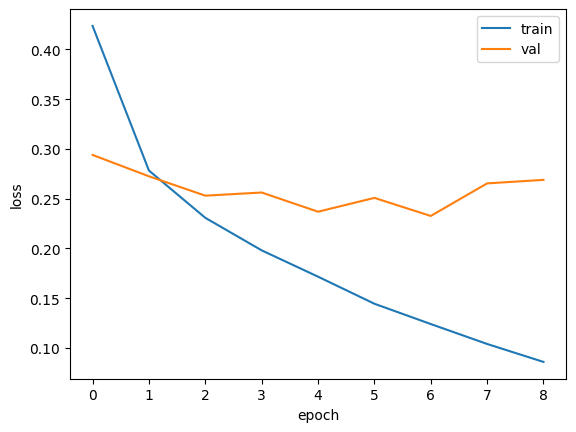

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [9]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.9177


[0.23260760307312012, 0.9176666736602783]

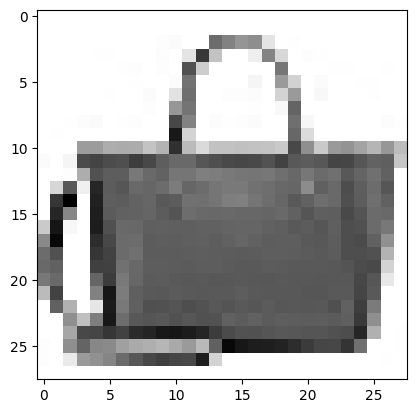

In [10]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

In [11]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 129ms/step
[[2.7390753e-14 2.2209573e-17 4.9741533e-16 5.5607079e-14 4.9264156e-16
  7.2906199e-13 4.6309880e-11 6.3022049e-13 1.0000000e+00 1.6445145e-13]]


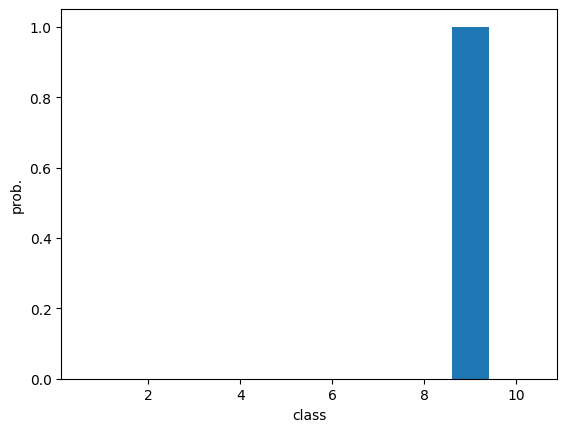

In [12]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [13]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '센탈', '셔츠', '스니커즈', '가방', '앵클 부츠']


In [14]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [15]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [16]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2602 - accuracy: 0.9122


[0.26018738746643066, 0.9121999740600586]

In [17]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-11-25 11:54:53--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 20.29.134.23
Connecting to github.com (github.com)|20.29.134.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-11-25 11:54:54--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.1’

best-cnn-model.h5.1 100%[===================>]   3.86M  --.-KB/s    in 0.05s   

2023-11-25 11:54:55 (71.3 MB/s) - ‘best-cnn-model.h5.1’ saved [4046712/4046712]

